# Long/Short Methodologies: Absolute and Relative


Absolute series are the Open High Low Close (OHLC) prices we can see on any platform. They often come either adjusted for dividends, stock splits, and other corporate actions. Relative series are the above absolute series divided by the closing price of the benchmark, adjusted for currency.

We hope to demonstrate the weaknesses of the absolute method, and strengths of the relative weakness method, which will define our methodology.

# Long/Short : The Absolute Method

The absolute method makes intuitive sense: buy stocks that go up, short stocks that go down. There is a one-to-one relationship between data coming from various providers, price charts on the screen, and what goes into the portfolio. Everybody speaks the same language. Shorting stocks that go down in absolute value generates cash that can be used to buy additional stocks on the long side and increase leverage.
The hope is to generate positive returns regardless of market direction (hence "absolute").

# Why Doesn’t It Work as Promised?
1. ## In Bull Markets (when most stocks rise):
Shorting becomes very hard: Since few stocks are falling, the few that do become overcrowded with short sellers.

These "crowded shorts" are:

*   Illiquid (hard to trade in size without moving the price)
*   Expensive (borrow fees go up), risky (prone to violent short squeezes)


Result: Fund managers limit their short positions to avoid risk, they’re heavily net long (more invested in stocks going up than down), which is just like betting on the market to go up.

Intuition: Even though the strategy says it's "market neutral," it's actually bullish because of the structural imbalance between long and short positions.

2. ## In Bear Markets (when most stocks fall):

Good short opportunities abound, but:
Long positions still exist (and drop in value).
Short positions are often not large enough to offset long losses.

Even with good short calls, net exposure rarely turns negative (more short than long).

Investors still lose money, just not as much.

Intuition: You protect yourself somewhat but you’re still bleeding.

What’s the Core Issue?
The strategy fails to remain neutral or negative correlated with the market:

In up markets: the fund behaves like a long-only fund.
In down markets: it cushions losses, but still takes hits.

This defeats the purpose of an absolute return hedge fund, which is supposed to make money regardless of market direction, and justifies high fees for being “uncorrelated.”

In [ ]:
pip install yfinance

In [4]:

import pandas as pd
import numpy as np
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt

### S&P500 stocks making 1 year high (bullish)/ low (bearish) in absolute/relative series
The following chart shows the S&P 500 index and a count of all the constituents in either the bull or bear regime using the absolute price series.

Indices such as S&P 500, Nasdaq 100, FTSE 100, and Topix are the market capitalization weighted average of their constituents. Roughly half the stocks will do better and the rest worse than the index over any timeframe.

['^GSPC', 'MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL'] 0 20
YF deprecation warning: set proxy via new config function: yf.set_config(proxy=proxy)


[*********************100%***********************]  20 of 20 completed


['GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'APO'] 20 40


[*********************100%***********************]  20 of 20 completed


['AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX'] 40 60


[*********************100%***********************]  20 of 20 completed


['BDX', 'BRK-B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'BLDR', 'BG', 'BXP', 'CHRW'] 60 80


[*********************100%***********************]  20 of 20 completed


['CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR'] 80 100


[*********************100%***********************]  20 of 20 completed


['CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'COIN', 'CL', 'CMCSA', 'CAG', 'COP'] 100 120


[*********************100%***********************]  20 of 20 completed


['ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', 'DRI', 'DVA', 'DAY'] 120 140


[*********************100%***********************]  20 of 20 completed


['DECK', 'DE', 'DELL', 'DAL', 'DVN', 'DXCM', 'FANG', 'DLR', 'DG', 'DLTR', 'D', 'DPZ', 'DASH', 'DOV', 'DOW', 'DHI', 'DTE', 'DUK', 'DD', 'EMN'] 140 160


[*********************100%***********************]  20 of 20 completed


['ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ELV', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR', 'ERIE', 'ESS', 'EL', 'EG'] 160 180


[*********************100%***********************]  20 of 20 completed


['EVRG', 'ES', 'EXC', 'EXE', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FICO', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FI', 'F'] 180 200


[*********************100%***********************]  20 of 20 completed


['FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT', 'GE', 'GEHC', 'GEV', 'GEN', 'GNRC', 'GD', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GL'] 200 220


[*********************100%***********************]  20 of 20 completed


['GDDY', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'DOC', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUBB'] 220 240


[*********************100%***********************]  20 of 20 completed


['HUM', 'HBAN', 'HII', 'IBM', 'IEX', 'IDXX', 'ITW', 'INCY', 'IR', 'PODD', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IQV'] 240 260


[*********************100%***********************]  20 of 20 completed


['IRM', 'JBHT', 'JBL', 'JKHY', 'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KVUE', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KKR', 'KLAC', 'KHC'] 260 280


[*********************100%***********************]  20 of 20 completed


['KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LII', 'LLY', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LULU', 'LYB', 'MTB', 'MPC'] 280 300


[*********************100%***********************]  20 of 20 completed


['MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA'] 300 320


[*********************100%***********************]  20 of 20 completed


['MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE'] 320 340


[*********************100%***********************]  20 of 20 completed


['NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OTIS', 'PCAR'] 340 360


[*********************100%***********************]  20 of 20 completed


['PKG', 'PLTR', 'PANW', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG'] 360 380


[*********************100%***********************]  20 of 20 completed


['PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD'] 380 400


[*********************100%***********************]  20 of 20 completed


['RVTY', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SRE', 'NOW', 'SHW', 'SPG', 'SWKS', 'SJM', 'SW', 'SNA', 'SOLV'] 400 420


[*********************100%***********************]  20 of 20 completed


['SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STLD', 'STE', 'SYK', 'SMCI', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP', 'TGT', 'TEL', 'TDY'] 420 440


[*********************100%***********************]  20 of 20 completed


['TER', 'TSLA', 'TXN', 'TPL', 'TXT', 'TMO', 'TJX', 'TKO', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'TSN', 'USB', 'UBER', 'UDR', 'ULTA'] 440 460


[*********************100%***********************]  20 of 20 completed


['UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VLTO', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VTRS', 'VICI', 'V', 'VST', 'VMC', 'WRB', 'GWW'] 460 480


[*********************100%***********************]  20 of 20 completed


['WAB', 'WBA', 'WMT', 'DIS', 'WBD', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WY', 'WSM', 'WMB', 'WTW', 'WDAY', 'WYNN', 'XEL', 'XYL'] 480 500


[*********************100%***********************]  20 of 20 completed


['YUM', 'ZBRA', 'ZBH', 'ZTS'] 500 520


[*********************100%***********************]  4 of 4 completed
<ipython-input-5-55ac9e1f459b>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_rel = round(df_abs.divide(df_abs[bm_ticker], axis=0).mul(df_abs[bm_ticker][0]),1)
<ipython-input-5-55ac9e1f459b>:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  index=df_rel.index,columns=df_rel.columns).fillna(method='ffill')
<ipython-input-5-55ac9e1f459b>:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  index=df_abs.index,columns=df_abs.columns).fillna(method='ffill')


<Axes: title={'center': 'S&P500, 1yr High/Low count: absolute & relative series'}, xlabel='Date'>

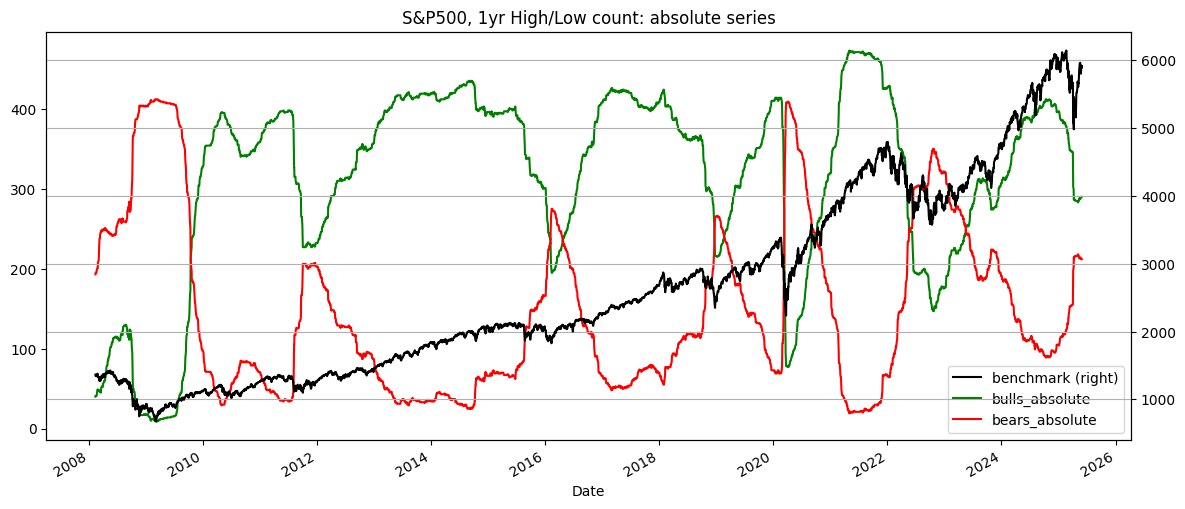

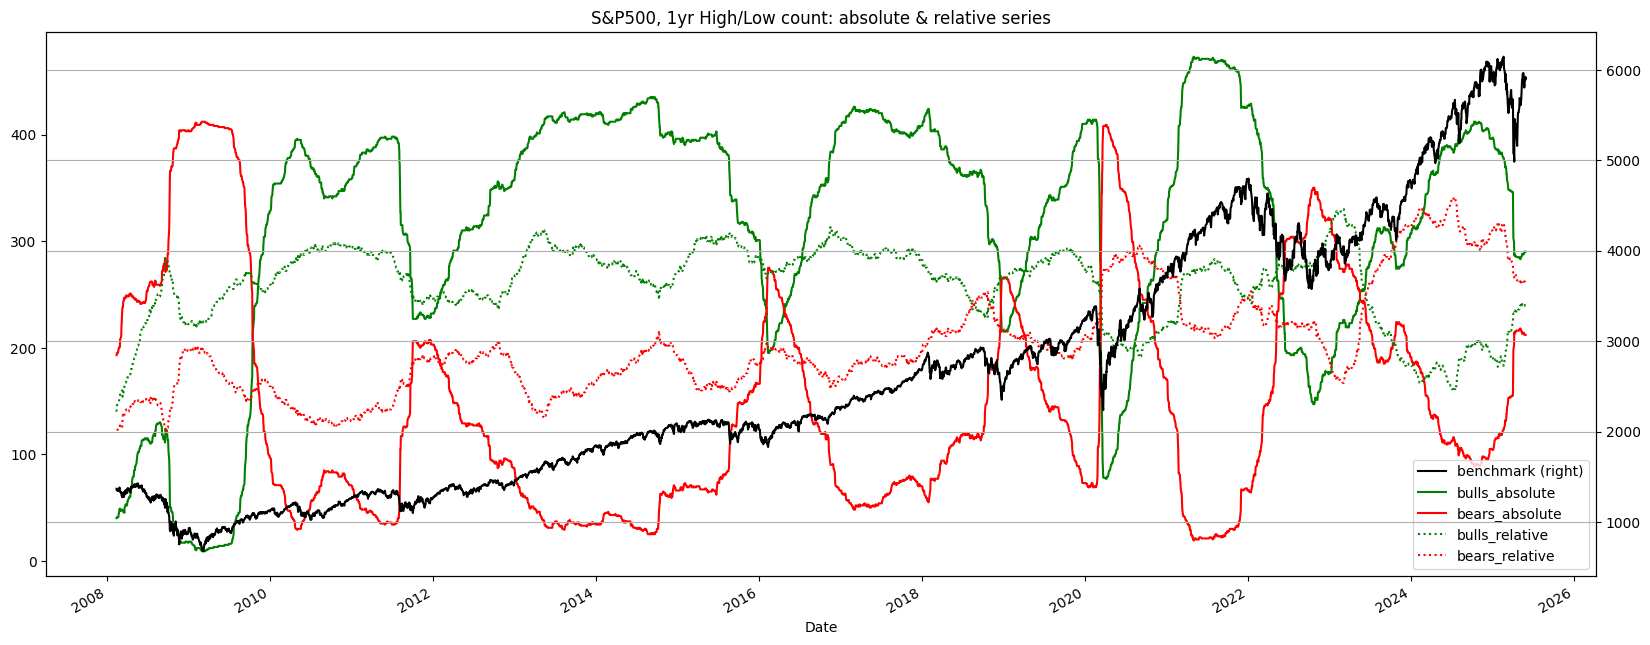

In [5]:
import yfinance as yf
# S&P500 dataframe: list of tickers
sp_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp_df['Symbol'] = sp_df['Symbol'].str.replace('.', '-')
bm_ticker = '^GSPC'
tickers_list = [bm_ticker] + list(sp_df['Symbol'])[:]

# Variables instantiation
window = 252
show_batch = True
df_abs = pd.DataFrame()
batch_size = 20
loop_size = int(len(tickers_list) // batch_size) + 2

for t in range(1,loop_size): # Batch download
    m = (t - 1) * batch_size
    n = t * batch_size
    batch_list = tickers_list[m:n]
    print(batch_list,m,n)
    batch_download = yf.download(tickers= batch_list,start= '2007-01-01', end = None,
                        interval = "1d",group_by = 'column',auto_adjust = True,
                              prepost = True, threads = True, proxy = None)['Close']
    df_abs = df_abs.join(batch_download, how='outer')

bullbear = pd.DataFrame()
bullbear['benchmark'] = round(df_abs[bm_ticker].copy(),2)
df_rel = round(df_abs.divide(df_abs[bm_ticker], axis=0).mul(df_abs[bm_ticker][0]),1)
df_rel = pd.DataFrame(data=np.where(df_rel >= df_rel.rolling(window).max(),1,
        np.where(df_rel <= df_rel.rolling(window).min(),-1,np.nan)),
            index=df_rel.index,columns=df_rel.columns).fillna(method='ffill')
df_abs = pd.DataFrame(data=np.where(df_abs >= df_abs.rolling(window).max(),1,
        np.where(df_abs<=df_abs.rolling(window).min(),-1,np.nan)),
            index=df_abs.index,columns=df_abs.columns).fillna(method='ffill')

bullbear['bulls_absolute'] = df_abs[df_abs > 0].count(axis=1)
bullbear['bears_absolute'] = df_abs[df_abs < 0].count(axis=1)
bullbear['bulls_relative'] = df_rel[df_rel > 0].count(axis=1)
bullbear['bears_relative'] = df_rel[df_rel < 0].count(axis=1)

bullbear[280:][['benchmark','bulls_absolute', 'bears_absolute',
               ]].plot(figsize=(14,6),
                style=['k', 'g', 'r'],grid=True,secondary_y=['benchmark'],
                title = 'S&P500, 1yr High/Low count: absolute series' )

bullbear[280:][['benchmark','bulls_absolute', 'bears_absolute', 'bulls_relative', 'bears_relative']].plot(figsize=(20,8),
                style=['k', 'g', 'r','g:', 'r:'],grid=True,secondary_y=['benchmark'],
                title = 'S&P500, 1yr High/Low count: absolute & relative series')

### Relative function

When the market goes up, the number of bullish stocks rises. When the market turns sideways or bearish, the number of stocks in bearish territory rises. This demonstrates that the absolute method is by definition correlated to the markets. It should suffice to look at the track record of long/short funds to conclude that the absolute method has failed to deliver uncorrelated attractive returns.



## Ineffective at reducing volatility
Since the short side has fewer ideas than the other, the way to balance exposures is to supersize the more concentrated book. This translates into a diluted, relatively low volatility long portfolio and a few concentrated "structural short" bets. Crowded shorts are illiquid and therefore more prone to volatility spikes. There is no shortage of sellers, but courageous buyers are scarce.

Note: Volatility on the short side drives the entire portfolio. Underwhelming performance divided by high residual volatility only yields unattractive volatility adjusted returns.

## Lesser investment vehicle
The absolute method has earned its existential crisis. It is neither a sophisticated, nor a safe investment vehicle. It is a lesser vehicle in every single respect. It makes less money than mutual funds and index funds in bull markets. It only loses less money than the index in bear markets. After fees, investors compound less money with the absolute method than they would with low-tech plain-vanilla index funds. There is less transparency and less liquidity than in classical mutual funds. It is therefore little surprise that those funds have failed to attract and retain pension money looking for stable, uncorrelated returns.

Laggard Indicator: The bottom line is, by the time those stocks pop up on people's radar screens, they have already shed a lot of value. In an industry where creative colorful insults are an occupational pastime, few zingers sting as much as being called a laggard indicator.

## Conclusion:
The absolute method in long/short investing fails to provide the uncorrelated, downside-protective, and risk-adjusted returns that investors expect despite charging high fees.

Breakdown of the Key Issues:

### High Correlation to the Benchmark

Investors pay for uncorrelated performance returns that don’t move with the S&P 500 or other benchmarks.

But the absolute method is structurally correlated:

In bull markets, it behaves like a long-only fund (high positive net exposure).

In bear markets, it can’t or won’t go meaningfully net short.

So, it wins when the market wins, and loses when the market loses, just less sharply.

Bottom line: It doesn’t justify hedge fund fees if it's just a softer version of the market.

# Long/Short: The Relative Weakness Method

The relative weakness method takes a similar approach. A long/short portfolio is the net sum of two relative books. The long side is a classic mutual fund-type long book. The short side is composed of underperformers benchmarked to the inverse of the index. The only difference with a mutual fund is instead of staying away from underperformers, managers take active bets on the short side. Performance comes from the spread between outperformance on the long side and underperformance on the short. Below is a simple example. General Electric, General Motors, and Goldman Sachs are in three different industries.

In [6]:


### RELATIVE
def relative(df,_o,_h,_l,_c, bm_df, bm_col, ccy_df, ccy_col, dgt, start, end,rebase=True):
    '''
    df: df
    bm_df, bm_col: df benchmark dataframe & column name
    ccy_df,ccy_col: currency dataframe & column name
    dgt: rounding decimal
    start/end: string or offset
    rebase: boolean rebase to beginning or continuous series
    '''
    # Slice df dataframe from start to end period: either offset or datetime
    df = df[start:end]

    # inner join of benchmark & currency: only common values are preserved
    df = df.join(bm_df[[bm_col]],how='inner')
    df = df.join(ccy_df[[ccy_col]],how='inner')

    # rename benchmark name as bm and currency as ccy
    df.rename(columns={bm_col:'bm', ccy_col:'ccy'},inplace=True)

    # Adjustment factor: calculate the scalar product of benchmark and currency
    df['bmfx'] = round(df['bm'].mul(df['ccy']),dgt).fillna(method='ffill')
    if rebase == True:
        df['bmfx'] = df['bmfx'].div(df['bmfx'][0])

    # Divide absolute price by fxcy adjustment factor and rebase to first value
    df['r' + str(_o)] = round(df[_o].div(df['bmfx']),dgt)
    df['r' + str(_h)] = round(df[_h].div(df['bmfx']),dgt)
    df['r'+ str(_l)] = round(df[_l].div(df['bmfx']),dgt)
    df['r'+ str(_c)] = round(df[_c].div(df['bmfx']),dgt)
    df = df.drop(['bm','ccy','bmfx'],axis=1)

    return (df)

### RELATIVE ###



### Softbank in absolute JPY & relative to Nasdaq in USD

Softbank (9984.T) is a company listed on the Tokyo Stock Exchange (TSE). It trades in Japanese yen. The company has been a major player in the US tech industry for almost three decades. Softbank will be benchmarked against Nasdaq in USD.  Softbank has been a powerhouse on the TSE since telephones have enchained mankind. Yet, Softbank has been a lackluster performer when benchmarked against the Nasdaq index and labelled in USD.

The concept is simple: buy the outperformers, sell short the underperformers, make money on the spread. The idea of focusing on the excess returns over the index is nothing new. Mutual funds managers are assessed on their outperformance over the benchmark. When focusing on only the long side, the mission is to overweigh outperformers and underweigh underperformers. The difference in weight over the benchmark is called "active money."

Same data, but the relative series is not rebased to the beginning of the series

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


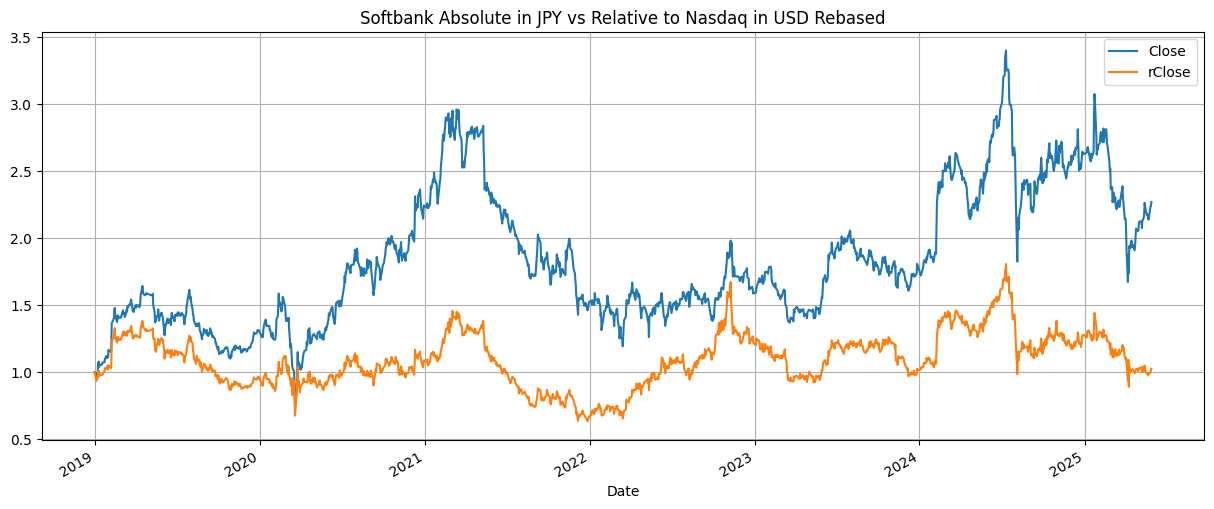

In [7]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

ticker = '9984.T'  # Softbank
ohlc = ['Open', 'High', 'Low', 'Close']
_o, _h, _l, _c = [ohlc[h] for h in range(len(ohlc))]
start = '2018-12-30'
end = None
dgt = 5

df = round(yf.download(tickers=ticker, start=start, end=end,
                       interval="1d", group_by='column', auto_adjust=True,
                       prepost=True, threads=True, proxy=None), 2)

# Flatten columns
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Benchmark
bm_df = pd.DataFrame()
bm_ticker = '^IXIC'
bm_col = 'nasdaq'
bm_df[bm_col] = yf.download(tickers=bm_ticker, start=start, end=end,
                            interval="1d", group_by='column', auto_adjust=True,
                            prepost=True, threads=True, proxy=None)['Close']

# Currency
ccy_df = pd.DataFrame()
ccy_ticker = 'USDJPY=X'
ccy_col = 'JPY'
ccy_df[ccy_col] = yf.download(tickers=ccy_ticker, start=start, end=end,
                              interval="1d", group_by='column', auto_adjust=True,
                              prepost=True, threads=True, proxy=None)['Close']

# Relative function
def relative(df, o, h, l, c, bm_df, bm_col, ccy_df, ccy_col, dgt, start, end, rebase=True):
    close_df = df[[c]].copy()
    close_df.columns = ['Close']  # normalize column name
    merged = close_df.merge(bm_df, left_index=True, right_index=True)
    merged = merged.merge(ccy_df, left_index=True, right_index=True)
    merged['rClose'] = (merged['Close'] / merged[bm_col]) * merged[ccy_col]
    if rebase:
        merged['Close'] = merged['Close'] / merged['Close'].iloc[0]
        merged['rClose'] = merged['rClose'] / merged['rClose'].iloc[0]
    return merged

# Apply
df = relative(df, _o, _h, _l, _c, bm_df, bm_col, ccy_df, ccy_col, dgt, start, end, rebase=True)

# Plot
df[['Close', 'rClose']].plot(figsize=(15, 6), grid=True,
                             title='Softbank Absolute in JPY vs Relative to Nasdaq in USD Rebased')
plt.show()


<Axes: title={'center': 'Softbank Absolute in JPY vs relative to Nasdaq in USD'}, xlabel='Date'>

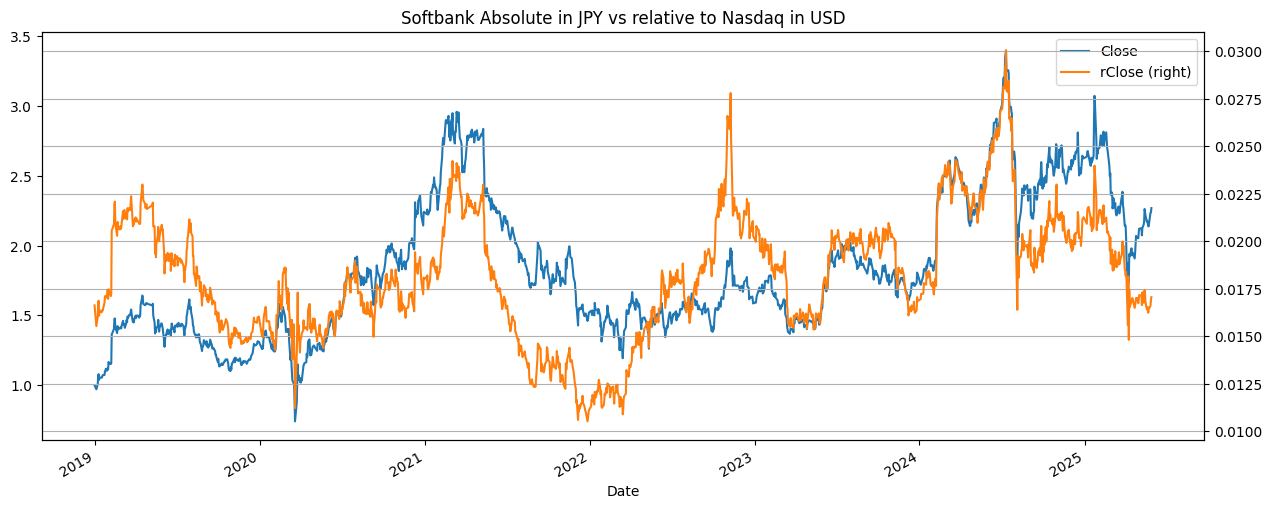

In [8]:

df2 = relative(df,_o,_h,_l,_c, bm_df, bm_col, ccy_df, ccy_col, dgt, start, end,rebase=False)
df2[['Close','rClose']].plot(figsize=(15,6),grid=True,secondary_y= 'rClose',
            title= 'Softbank Absolute in JPY vs relative to Nasdaq in USD' )

The relative weakness method takes a similar approach. A long/short portfolio is the net sum of two relative books. The long side is a classic mutual fund-type long book. The short side is composed of underperformers benchmarked to the inverse of the index. The only difference with a mutual fund is instead of staying away from underperformers, managers take active bets on the short side. Performance comes from the spread between outperformance on the long side and underperformance on the short. Below is a simple example. General Electric, General Motors, and Goldman Sachs are in three different industries.

### Comparison of three stocks across 3 different sectors


### Wells Fargo 1 year before the scandal in absolute and relative

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-9-af30a14defa8>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gems['rel_'+ticker] = gems[ticker].div(benchmark * gems[ticker][0]) * benchmark[0]
[*********************100%***********************]  1 of 1 completed
<ipython-input-9-af30a14defa8>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gems['rel_'+ticker] = gems[ticker].div(benchmark * gems[ticker][0]) * benchmark[0]
[*********************100%***********************]  1 of 1 completed
<ipython-input-9-af3

<Axes: title={'center': 'GEMS Absolute Prices vs Relative Series'}, xlabel='Date'>

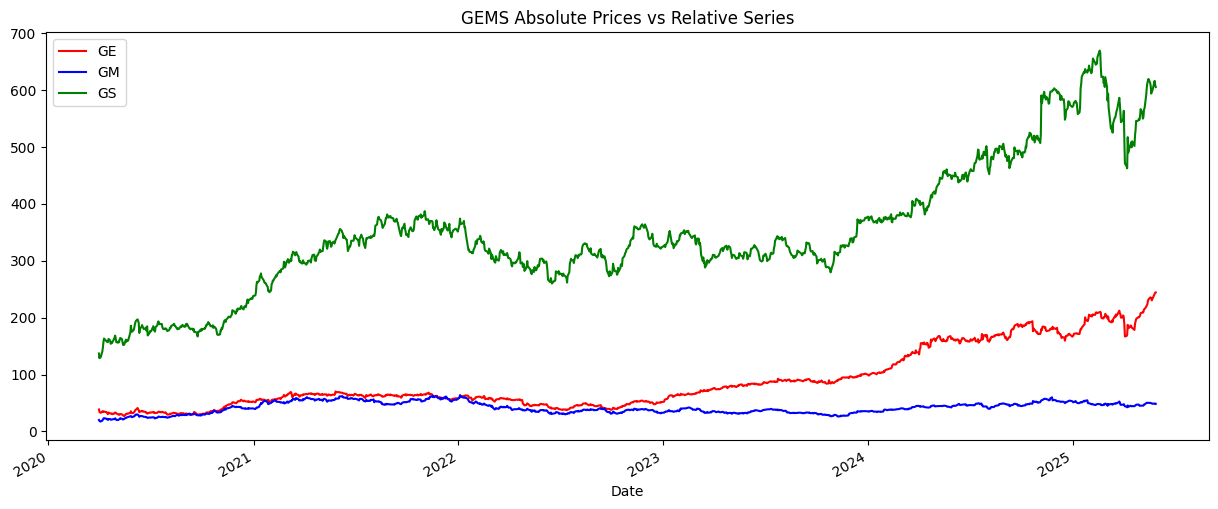

In [9]:


tickers_list = ['GE','GM','GS']

# Dataframes instantiation
gems = pd.DataFrame()
start = '2020-03-31'
benchmark = yf.download(tickers= '^GSPC',start= start, end = None,
                        interval = "1d",group_by = 'column',auto_adjust = True,
                              prepost = True, threads = True, proxy = None)['Close']
failed = []
rel_ticker_list = []
for n,ticker in enumerate(tickers_list):
    try: #7 Download & process data
        gems[ticker] = yf.download(tickers= ticker,start= start, end = None,
                        interval = "1d",group_by = 'column',auto_adjust = True,
                              prepost = True, threads = True, proxy = None)['Close']
        gems['rel_'+ticker] = gems[ticker].div(benchmark * gems[ticker][0]) * benchmark[0]
        rel_ticker_list.append('rel_'+ticker)
    except:
        failed.append(ticker)
gems = gems[tickers_list+rel_ticker_list]
gems.plot(figsize= (15,6),secondary_y= rel_ticker_list,style=['r','b','g','r:','b:','g:'],
          title= 'GEMS Absolute Prices vs Relative Series' )

The chart illustrates that relative series are a bit more indicative of a stock's relative strength compared to the market. Prices are restarted versus the benchmark at the beginning of the period, but they provide uniform series across sectors. At first, it may seem unnatural to enter a short position on a rising stock. Losing money does not come naturally to absolute return players. To understand the concept, let's reframe it by picturing what happens in a bear market. When the big bear pounds the market, nothing goes up. This means that we'll be looking to buy long defensive stocks that hold their ground or fall slower than the broader index. We will be losing less than the market on the long side. Typically you would be buying non-cyclical utilities, railways, or food stocks.

Conversely, we will be looking to short stocks that drop faster than the benchmark. Those tend to be cyclical stocks for which performance ebbs and flows with the economic cycle, such as airline companies. By the way, you can keep the darlings of the previous bull markets in your portfolio, but remember to switch sides. Leaders of bull markets tend to attract late-cycle momentum players. Those are the weakest market participants, late to the game, with no real game plan. They bail as soon as the going gets tough, which leads to sudden performance disgorgement. The relative series open a whole new world of possibilities compared with the classic absolute method.

# Regime
In the stock market, regime is another word for triage.
Markets tend to "stay wrong" a lot longer than investors tend to stick with around. Segregating stocks into different regime buckets—triaging them before performing in-depth analysis is an efficient allocation of resources. The objective of this initial triage is not to predict where stocks could, would, or should be headed, but to practice the long-lost art of actively listening to what the market has to say.

In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [11]:
### Graph Regimes ###
def graph_regime_combo(ticker,df,_c,rg,lo,hi,slo,shi,clg,flr,rg_ch,
                       ma_st,ma_mt,ma_lt,lt_lo,lt_hi,st_lo,st_hi):

    '''
    https://www.color-hex.com/color-names.html
    ticker,df,_c: _c is closing price
    rg: regime -1/0/1 using floor/ceiling method
    lo,hi: small, noisy highs/lows
    slo,shi: swing lows/highs
    clg,flr: ceiling/floor

    rg_ch: regime change base
    ma_st,ma_mt,ma_lt: moving averages ST/MT/LT
    lt_lo,lt_hi: range breakout High/Low LT
    st_lo,st_hi: range breakout High/Low ST
    '''
    fig = plt.figure(figsize=(20,8))
    ax1 = plt.subplot2grid((1,1), (0,0))
    date = df.index
    close = df[_c]
    ax1.plot_date(df.index, close,'-', color='k',  label=ticker.upper())
    try:
        if pd.notnull(rg):
            base = df[rg_ch]
            regime = df[rg]

            if df[lo].count()>0:
                ax1.plot(df.index, df[lo],'.' ,color='r', label= 'swing low',alpha= 0.6)
            if df[hi].count()>0:
                ax1.plot(df.index, df[hi],'.' ,color='g', label= 'swing high',alpha= 0.6)
            if df[slo].count()>0:
                ax1.plot(df.index, df[slo],'o' ,color='r', label= 'swing low',alpha= 0.8)
            if df[shi].count()>0:
                ax1.plot(df.index, df[shi],'o' ,color='g', label= 'swing high',alpha= 0.8)
            if df[flr].count()>0:
                plt.scatter(df.index, df[flr],c='k',marker='^',label='floor')
            if df[clg].count() >0:
                plt.scatter(df.index, df[clg],c='k',marker='v',label='ceiling')

            ax1.plot([],[],linewidth=5, label= 'bear', color='m',alpha=0.1)
            ax1.plot([],[],linewidth=5 , label= 'bull', color='b',alpha=0.1)
            ax1.fill_between(date, close, base,where=((regime==1)&(close > base)), facecolor='b', alpha=0.1)
            ax1.fill_between(date, close, base,where=((regime==1)&(close < base)), facecolor='b', alpha=0.4)
            ax1.fill_between(date, close, base,where=((regime==-1)&(close < base)), facecolor='m', alpha=0.1)
            ax1.fill_between(date, close, base,where=((regime==-1)&(close > base)), facecolor='m', alpha=0.4)

        if np.sum(ma_st) >0 :
            ax1.plot(df.index,ma_st,'-' ,color='lime', label= 'ST MA')
            ax1.plot(df.index,ma_mt,'-' ,color='green', label= 'MT MA')
            ax1.plot(df.index,ma_lt,'-' ,color='red', label= 'LT MA')

            if pd.notnull(rg): # floor/ceiling regime present
                # Profitable conditions
                ax1.fill_between(date,close, ma_mt,where=((regime==1)&(ma_mt >= ma_lt)&(ma_st>=ma_mt)),
                             facecolor='green', alpha=0.5)
                ax1.fill_between(date,close, ma_mt,where=((regime==-1)&(ma_mt <= ma_lt)&(ma_st <= ma_mt)),
                             facecolor='red', alpha=0.5)
                # Unprofitable conditions
                ax1.fill_between(date,close, ma_mt,where=((regime==1)&(ma_mt>=ma_lt)&(ma_st>=ma_mt)&(close<ma_mt)),
                             facecolor='darkgreen', alpha=1)
                ax1.fill_between(date,close, ma_mt,where=((regime==-1)&(ma_mt<=ma_lt)&(ma_st<=ma_mt)&(close>=ma_mt)),
                             facecolor='darkred', alpha=1)

            elif pd.isnull(rg): # floor/ceiling regime absent
                 # Profitable conditions
                ax1.fill_between(date,close, ma_mt,where=((ma_mt >= ma_lt)&(ma_st>=ma_mt)),
                             facecolor='green', alpha=0.4)
                ax1.fill_between(date,close, ma_mt,where=((ma_mt <= ma_lt)&(ma_st <= ma_mt)),
                             facecolor='red', alpha=0.4)
                # Unprofitable conditions
                ax1.fill_between(date,close, ma_mt,where=((ma_mt >= ma_lt)&(ma_st >= ma_mt)&(close < ma_mt)),
                             facecolor='darkgreen', alpha=1)
                ax1.fill_between(date,close, ma_mt,where=((ma_mt <= ma_lt)&(ma_st <= ma_mt)&(close >= ma_mt)),
                             facecolor='darkred', alpha=1)

        if (np.sum(lt_hi) > 0): # LT range breakout
            ax1.plot([],[],linewidth=5, label= ' LT High', color='m',alpha=0.2)
            ax1.plot([],[],linewidth=5, label= ' LT Low', color='b',alpha=0.2)

            if pd.notnull(rg): # floor/ceiling regime present
                ax1.fill_between(date, close, lt_lo,
                                 where=((regime ==1) & (close > lt_lo) ),
                                 facecolor='b', alpha=0.2)
                ax1.fill_between(date,close, lt_hi,
                                 where=((regime ==-1) & (close < lt_hi)),
                                 facecolor='m', alpha=0.2)
                if (np.sum(st_hi) > 0): # ST range breakout
                    ax1.fill_between(date, close, st_lo,
                                     where=((regime ==1)&(close > st_lo) ),
                                     facecolor='b', alpha=0.3)
                    ax1.fill_between(date,close, st_hi,
                                     where=((regime ==-1) & (close < st_hi)),
                                     facecolor='m', alpha=0.3)

            elif pd.isnull(rg): # floor/ceiling regime absent
                ax1.fill_between(date, close, lt_lo,
                                 where=((close > lt_lo) ), facecolor='b', alpha=0.2)
                ax1.fill_between(date,close, lt_hi,
                                 where=((close < lt_hi)), facecolor='m', alpha=0.2)
                if (np.sum(st_hi) > 0): # ST range breakout
                    ax1.fill_between(date, close, st_lo,
                                     where=((close > st_lo) & (st_lo >= lt_lo)), facecolor='b', alpha=0.3)
                    ax1.fill_between(date,close, st_hi,
                                     where=((close < st_hi)& (st_hi <= lt_hi)), facecolor='m', alpha=0.3)

            if (np.sum(st_hi) > 0): # ST range breakout
                ax1.plot([],[],linewidth=5, label= ' ST High', color='m',alpha=0.3)
                ax1.plot([],[],linewidth=5, label= ' ST Low', color='b',alpha=0.3)

            ax1.plot(df.index, lt_lo,'-.' ,color='b', label= 'LT low',alpha=0.2)
            ax1.plot(df.index, lt_hi,'-.' ,color='m', label= 'LT high',alpha=0.2)
    except:
        pass

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)
    ax1.xaxis.label.set_color('k')
    ax1.yaxis.label.set_color('k')
    plt.xlabel('Date')
    plt.ylabel(str.upper(ticker) + ' Price')
    plt.title(str.upper(ticker))
    plt.legend()


[*********************100%***********************]  1 of 1 completed
<ipython-input-12-6a6cf13b404c>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  roll_hl = pd.Series(index= df.index, data= hl.flatten()).fillna(method= 'ffill')


<Axes: title={'center': '9984.T 252 days high/low'}, xlabel='Date'>

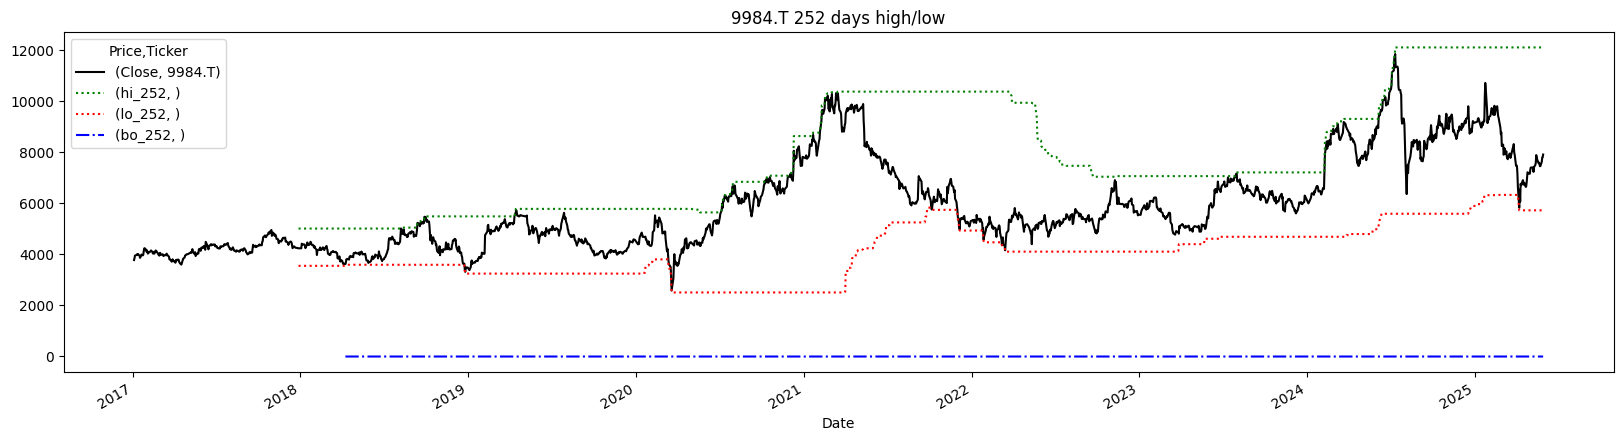

In [12]:
def regime_breakout(df,_h,_l,window):
    hl =  np.where(df[_h] == df[_h].rolling(window).max(),1,
                                np.where(df[_l] == df[_l].rolling(window).min(), -1,np.nan))
    # Flatten the hl array to ensure it's 1-dimensional
    roll_hl = pd.Series(index= df.index, data= hl.flatten()).fillna(method= 'ffill')
    return roll_hl

ticker = '9984.T' # Softbank
start= '2016-12-31'
end = None
df = yf.download(tickers= ticker,start= start, end = end,interval = "1d",
                 group_by = 'column',auto_adjust = True, prepost = True,
                 threads = True, proxy = None)

window = 252
df['hi_'+str(window)] = df['High'].rolling(window).max()
df['lo_'+str(window)] = df['Low'].rolling(window).min()
df['bo_'+ str(window)]= regime_breakout(df= df,_h= 'High',_l= 'Low',window= window)
df[['Close','hi_'+str(window),'lo_'+str(window),'bo_'+ str(window)]].plot(secondary_y= ['bo_'+ str(window)],
                                figsize=(20,5), style=['k','g:','r:','b-.'],
                                 title = str.upper(ticker)+' '+str(window)+' days high/low')

# Regime methodology

This is the oldest and simplest trend-following method. It works for both bull and bear markets. If the price makes a new high over x number of periods, the regime is bullish. If the price makes a fresh low over x number of periods, the regime is bearish.

[*********************100%***********************]  1 of 1 completed
<ipython-input-13-fe5b228597fd>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return pd.Series(index=df.index, data=hl.flatten()).fillna(method= 'ffill')


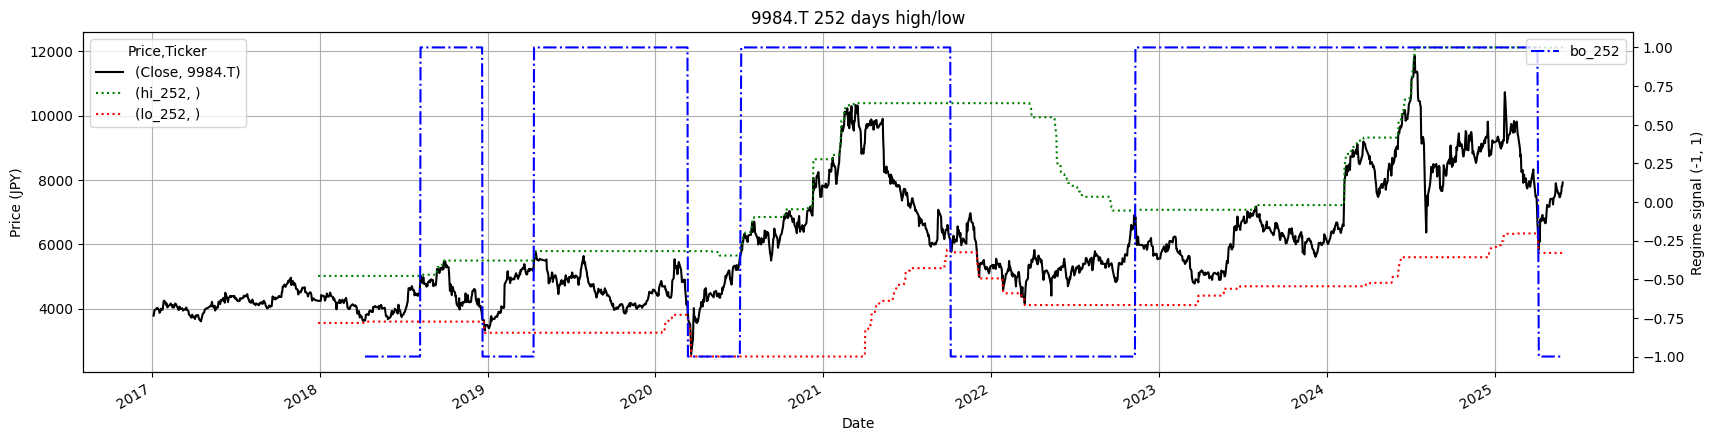

In [13]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def regime_breakout(df, _h, _l, window):
    hl = np.where(df[_h] == df[_h].rolling(window).max(), 1,
         np.where(df[_l] == df[_l].rolling(window).min(), -1, np.nan))
    # Explicitly flatten the hl array to ensure it's 1-dimensional
    return pd.Series(index=df.index, data=hl.flatten()).fillna(method= 'ffill')

ticker = '9984.T'
start = '2016-12-31'
window = 252

df = yf.download( tickers=ticker, start=start, end=None, interval="1d",
                 group_by='column', auto_adjust=True, prepost=True, threads=True, proxy=None)

# Calculate high/low and breakout regime
df[f'hi_{window}'] = df['High'].rolling(window).max()
df[f'lo_{window}'] = df['Low'].rolling(window).min()
df[f'bo_{window}'] = regime_breakout(df, _h='High', _l='Low', window=window)

# Plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot price + high/low
df[['Close', f'hi_{window}', f'lo_{window}']].plot(ax=ax1, style=['k', 'g:', 'r:'])
ax1.set_ylabel("Price (JPY)")
ax1.set_xlabel("Date")

# Plot regime signal on secondary y-axis
ax2 = ax1.twinx()
df[f'bo_{window}'].plot(ax=ax2, style='b-.', label=f'bo_{window}')
ax2.set_ylim(-1.1, 1.1)
ax2.set_ylabel("Regime signal (-1, 1)")
ax2.legend(loc='upper right')

# Title and grid
ax1.set_title(f'{ticker.upper()} {window} days high/low')
ax1.grid(True)
plt.show()

**Interpretation**: The graph illustrates the price behavior of Softbank (9984.T) over time, overlaid with its 252-day rolling highs (green), lows (red), and a regime signal (bo_252, blue) that identifies breakout and breakdown periods. When the blue line jumps to 1, it indicates a breakout into a new 252-day high, signaling a bullish regime. When it drops to -1, it signals a breakdown to a new 252-day low, indicating a bearish regime. These regime periods persist until a new extreme is reached. The chart shows that Softbank experienced bullish breakouts in 2018, 2021, and 2024, followed by significant price gains, while bearish breakdowns (2022 and early 2025) coincided with downward price trends demonstrating how regime shifts align with major directional moves in the stock.

The main advantages of this method are computational simplicity and stability. The major drawbacks are its inherent lag and the discomfort of giving back large amounts of profits. This leads us to the asymmetrical range breakout strategy.

Further refinements to the breakout regime definition method include dissociated periods for entries and exits. For example, the legendary Chicago Turtle Traders entered on 50-day highs and closed on 20-day lows.

### Utilities functions
1. lower_upper_OHLC: return _o,_h,_l,_c in small caps or title, absolute or relative
2. regime_args: returns regime definition arguments

In [14]:
def lower_upper_OHLC(df,relative = False):
    if relative==True:
        rel = 'r'
    else:
        rel= ''
    if 'Open' in df.columns:
        ohlc = [rel+'Open',rel+'High',rel+'Low',rel+'Close']
    elif 'open' in df.columns:
        ohlc = [rel+'open',rel+'high',rel+'low',rel+'close']

    try:
        _o,_h,_l,_c = [ohlc[h] for h in range(len(ohlc))]
    except:
        _o=_h=_l=_c= np.nan
    return _o,_h,_l,_c

def  regime_args(df,lvl,relative= False):
    if ('Low' in df.columns) & (relative == False):
        reg_val = ['Lo1','Hi1','Lo'+str(lvl),'Hi'+str(lvl),'rg','clg','flr','rg_ch']
    elif ('low' in df.columns) & (relative == False):
        reg_val = ['lo1','hi1','lo'+str(lvl),'hi'+str(lvl),'rg','clg','flr','rg_ch']
    elif ('Low' in df.columns) & (relative == True):
        reg_val = ['rL1','rH1','rL'+str(lvl),'rH'+str(lvl),'rrg','rclg','rflr','rrg_ch']
    elif ('low' in df.columns) & (relative == True):
        reg_val = ['rl1','rh1','rl'+str(lvl),'rh'+str(lvl),'rrg','rclg','rflr','rrg_ch']

    try:
        rt_lo,rt_hi,slo,shi,rg,clg,flr,rg_ch = [reg_val[s] for s in range(len(reg_val))]
    except:
        rt_lo=rt_hi=slo=shi=rg=clg=flr=rg_ch= np.nan
    return rt_lo,rt_hi,slo,shi,rg,clg,flr,rg_ch

### Turtle for dummies
Turtle is an asymmetrical range breakout strategy:
1. Enter on longer duration: slow
2. Exit on faster duration: fast

Plot: Softbank with asymmetrical regime breakout duration (turtle traders for dummies)

In [20]:
def regime_breakout(df, _h, _l, window):
    hl = np.where(df[_h] == df[_h].rolling(window).max(), 1,
         np.where(df[_l] == df[_l].rolling(window).min(), -1, np.nan))
    roll_hl = pd.Series(index=df.index, data=hl.flatten()).fillna(method='ffill')
    return roll_hl

def turtle_trader(df, _h, _l, slow, fast):
    _slow = regime_breakout(df, _h, _l, window=slow)
    _fast = regime_breakout(df, _h, _l, window=fast)
    return pd.Series(index=df.index,
                     data=np.where(_slow == 1, np.where(_fast == 1, 1, 0),
                           np.where(_slow == -1, np.where(_fast == -1, -1, 0), 0)))

# Set your OHLC columns
_o, _h, _l, _c = 'Open', 'High', 'Low', 'Close'

# Define your slow/fast breakout windows
slow = 200
fast = 50

# Generate breakout and turtle strategy signals
df[f'bo_{slow}'] = regime_breakout(df, _h, _l, window=slow)
df[f'bo_{fast}'] = regime_breakout(df, _h, _l, window=fast)
df[f'turtle_{slow}{fast}'] = turtle_trader(df, _h, _l, slow=slow, fast=fast)

# Set rg_cols for plot title
rg_cols = [f'bo_{slow}', f'bo_{fast}', f'turtle_{slow}{fast}']


<ipython-input-20-486a58d6e98b>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  roll_hl = pd.Series(index=df.index, data=hl.flatten()).fillna(method='ffill')
<ipython-input-20-486a58d6e98b>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  roll_hl = pd.Series(index=df.index, data=hl.flatten()).fillna(method='ffill')
<ipython-input-20-486a58d6e98b>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  roll_hl = pd.Series(index=df.index, data=hl.flatten()).fillna(method='ffill')


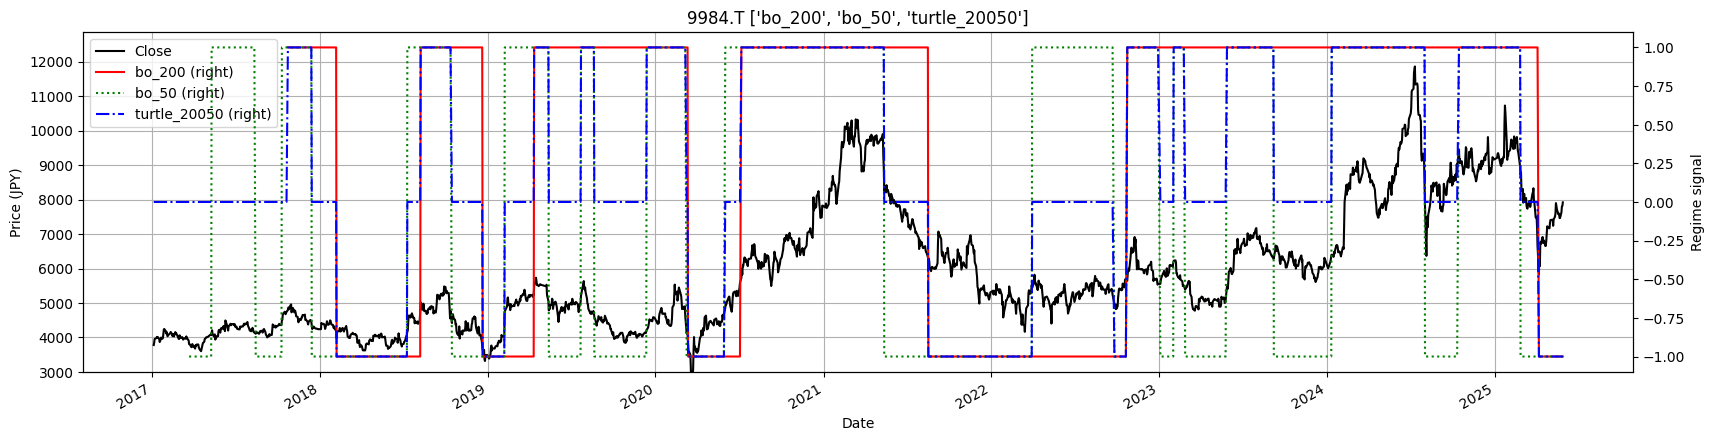

In [21]:
fig, ax1 = plt.subplots(figsize=(20, 5))

# Extract close price
price_series = df['Close']
if isinstance(price_series, pd.DataFrame):
    price_series = price_series.iloc[:, 0]

price_series.plot(ax=ax1, style='k', label='Close')
ax1.set_ylabel("Price (JPY)")
ax1.set_ylim(3000, price_series.max() + 1000)
ax1.set_yticks(np.arange(3000, price_series.max() + 1000, 1000))
ax1.set_xlabel("Date")

# Plot regime signals on secondary axis
ax2 = ax1.twinx()
df[f'bo_{slow}'].plot(ax=ax2, style='r', label=f'bo_{slow} (right)')
df[f'bo_{fast}'].plot(ax=ax2, style='g:', label=f'bo_{fast} (right)')
df[f'turtle_{slow}{fast}'].plot(ax=ax2, style='b-.', label=f'turtle_{slow}{fast} (right)')

ax2.set_ylim(-1.1, 1.1)
ax2.set_yticks(np.arange(-1.0, 1.1, 0.25))
ax2.set_ylabel("Regime signal")

# Legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

ax1.set_title(f"{ticker.upper()} {rg_cols}")
ax1.grid(True)
plt.show()


This graph shows the closing price of Softbank, the slow regime breakout (orange solid line), the fast regime breakout (green dotted line), and the blue dashed-dotted line as the combination of both. The blue dashed-dotted line gives entries and exits. It is a bit difficult to read, so we will use a visually friendlier chart below.

The turtle strategy outlined above is a rudimentary script inspired by the legendary Turtle Traders. It is composed of two range breakout regimes. The slower duration is used for entries. The faster duration is used for exits. This asymmetrical duration for entry and exit relies on a time-honored principle: be prudent and deliberate to confirm trends, but quick and decisive to cut losses and protect profits.

A more visual representation of the turtle for dummies strategies using graph_regime_combo

<ipython-input-11-ea6d3e2aa7ea>:22: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax1.plot_date(df.index, close,'-', color='k',  label=ticker.upper())


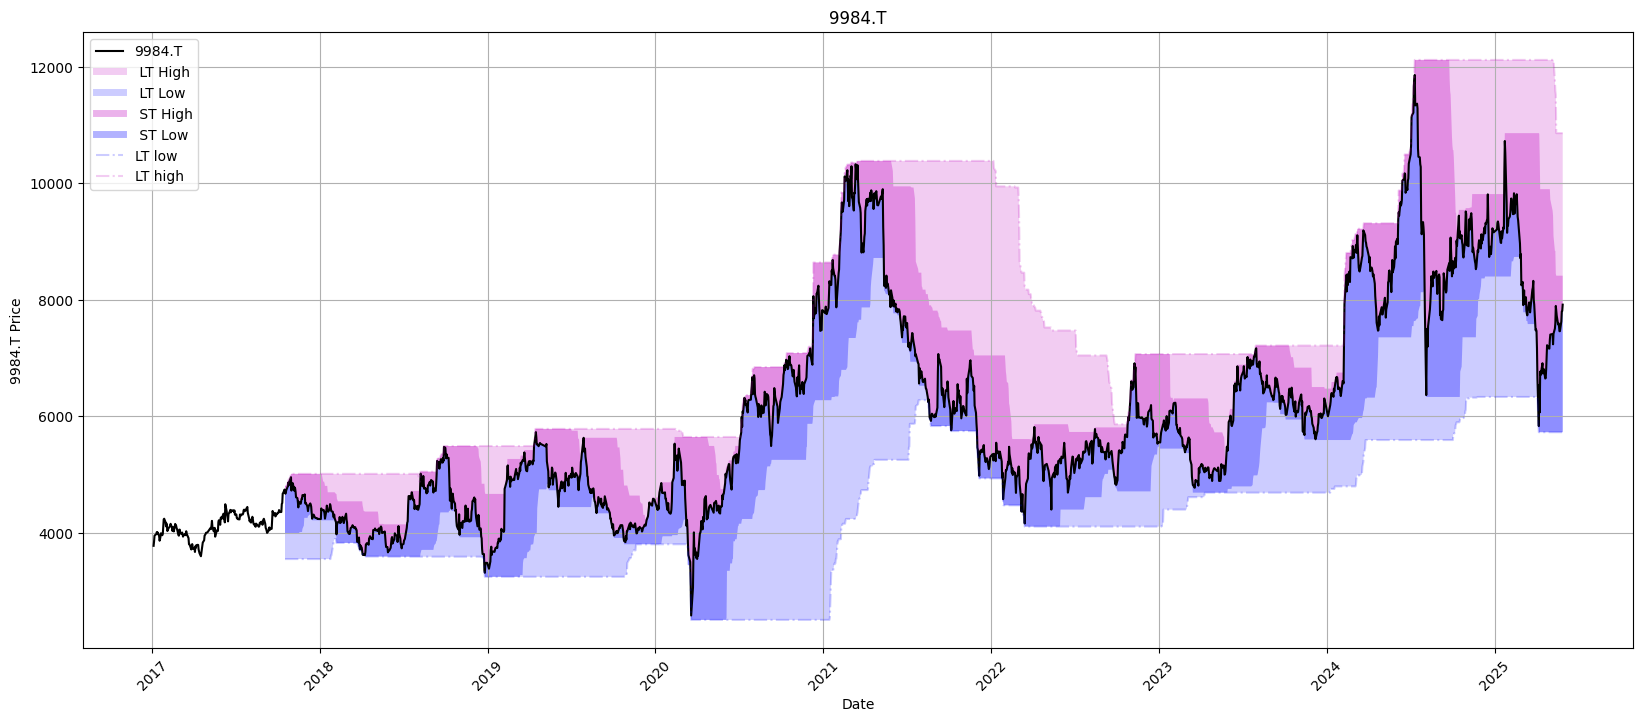

In [18]:
# Flatten MultiIndex (if applicable)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Set up OHLC
_o, _h, _l, _c = 'Open', 'High', 'Low', 'Close'

# No MAs or swing points
ma_st = ma_mt = ma_lt = 0
rg = lo = hi = slo = shi = clg = flr = rg_ch = None

# Breakout windows
bo_lt = 200
bo_st = 50

# Compute breakout ranges (1D, clean)
lt_lo = df[_l].rolling(window=bo_lt).min()
lt_hi = df[_h].rolling(window=bo_lt).max()
st_lo = df[_l].rolling(window=bo_st).min()
st_hi = df[_h].rolling(window=bo_st).max()

#  Visualize Turtle breakout zones
graph_regime_combo(ticker, df, _c, rg, lo, hi, slo, shi, clg, flr, rg_ch,ma_st, ma_mt, ma_lt,lt_lo, lt_hi, st_lo, st_hi)


**Observation:** The price fell sharply from a peak and touched or dipped below the short-term breakout (ST Low – 50-day low, shaded blue).

Shortly after, the price rebounded, but it still remains below the long-term high (LT High – 200-day high, shaded purple).

The price is currently hovering inside the blue and purple zones, not breaking decisively.

The Turtle strategy is currently in a "neutral/no position. Price is still below 200-day high. ** DoNothing and Wait**

# Moving average crossover

### Moving average crossover
1. regime_sma: simple moving average crossover strategy
    1. Bullish: st > mt = 1
    2. Bearish: st < mt = -1
2. regime_ema: exponential moving average crossover strategy
    1. Bullish: st > mt = 1
    2. Bearish: st < mt = -1
    
3. Plot: Softbank regimes using turtle breakout, SMA, and EMA

Moving averages are another popular regime definition method. This method is so simple and prevalent that even the most hardcore fundamental analysts who claim never to look at charts still like to have a 200-day simple moving average. This method is also computationally easy. There may be further refinements as to the type of moving averages from simple to exponential, triangular, adaptive. Yet, the principle is the same. When the faster moving average is above the slower one, the regime is bullish. When it is below the slower one, the regime is bearish.

<Axes: title={'center': "9984.T ['sma_50200', 'ema_50200', 'turtle_20050']"}, xlabel='Date'>

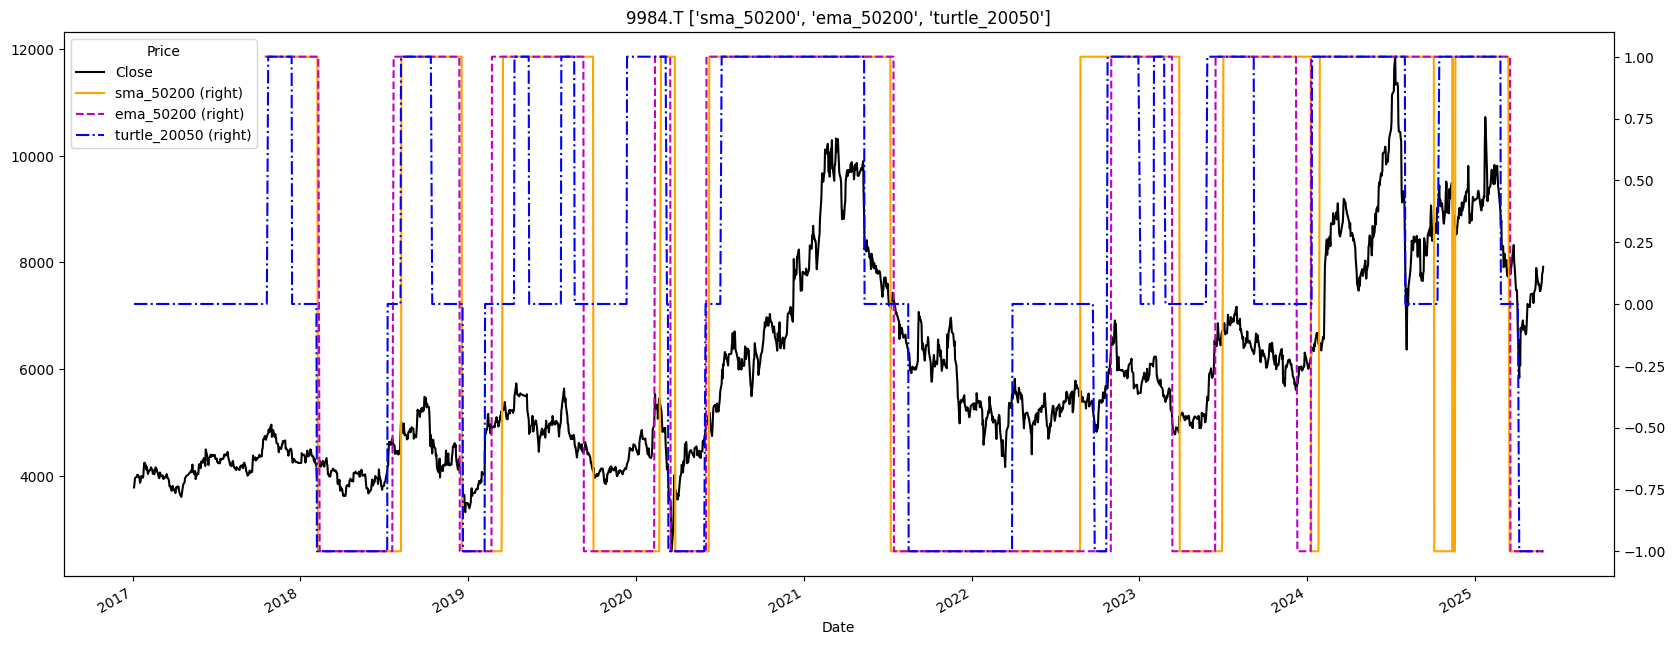

In [29]:
def regime_sma(df,_c,st,lt):
    '''
    bull +1: sma_st >= sma_lt , bear -1: sma_st <= sma_lt
    '''
    sma_lt = df[_c].rolling(lt).mean()
    sma_st = df[_c].rolling(st).mean()
    rg_sma = np.sign(sma_st - sma_lt)
    return rg_sma

def regime_ema(df,_c,st,lt):
    '''
    bull +1: ema_st >= ema_lt , bear -1: ema_st <= ema_lt
    '''
    ema_st = df[_c].ewm(span=st,min_periods = st).mean()
    ema_lt = df[_c].ewm(span=lt,min_periods = lt).mean()
    rg_ema = np.sign(ema_st - ema_lt)
    return rg_ema

st = 50
lt = 200
df['sma_' + str(st) + str(lt)] = regime_sma(df, _c='Close', st= st, lt= lt)
df['ema_' + str(st) + str(lt)] = regime_ema(df, _c='Close', st= st, lt= lt)

_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)

rgme_cols = ['sma_' + str(st) + str(lt), 'ema_' + str(st) + str(lt),'turtle_'+ str(slow)+str(fast) ]
df[['Close','sma_' + str(st) + str(lt), 'ema_' + str(st) + str(lt),'turtle_'+ str(slow)+str(fast)] ].plot(
    secondary_y= rgme_cols,figsize=(20,8), style=['k','orange','m--','b-.'],
                                 title = str.upper(ticker)+' '+str(rgme_cols))

<ipython-input-20-486a58d6e98b>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  roll_hl = pd.Series(index=df.index, data=hl.flatten()).fillna(method='ffill')


<Axes: title={'center': "9984.T ['sma_50200', 'ema_50200', 'turtle_20050']"}, xlabel='Date'>

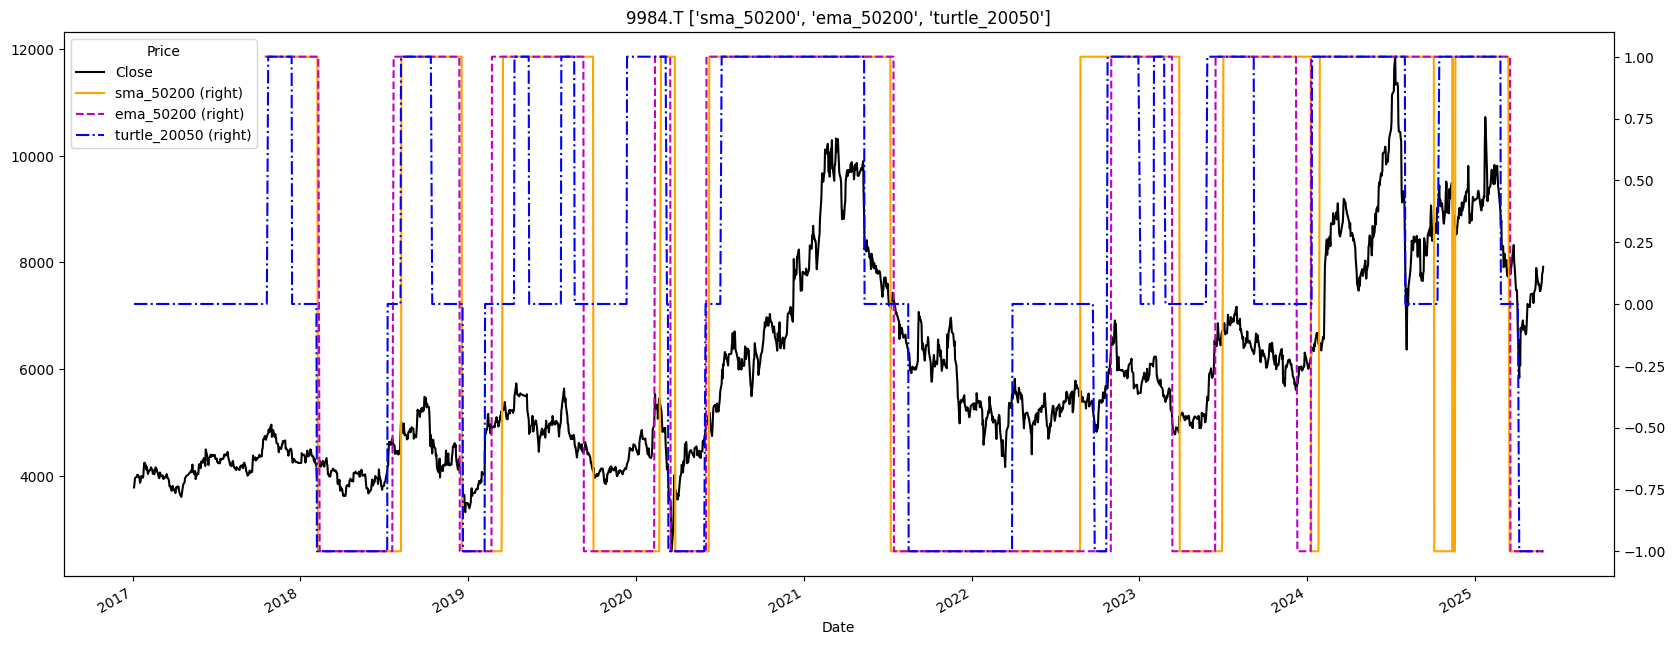

In [22]:
# Define turtle if not already
df['turtle_' + str(slow) + str(fast)] = turtle_trader(df, _h='High', _l='Low', slow=slow, fast=fast)

# Define moving average regime signals
st = 50
lt = 200

df['sma_' + str(st) + str(lt)] = regime_sma(df, _c='Close', st=st, lt=lt)
df['ema_' + str(st) + str(lt)] = regime_ema(df, _c='Close', st=st, lt=lt)

# Re-define OHLC labels
_o, _h, _l, _c = lower_upper_OHLC(df, relative=False)

# Columns to use in plotting
rgme_cols = ['sma_' + str(st) + str(lt), 'ema_' + str(st) + str(lt), 'turtle_' + str(slow) + str(fast)]

# Plot
df[['Close'] + rgme_cols].plot(
    secondary_y=rgme_cols,
    figsize=(20, 8),
    style=['k', 'orange', 'm--', 'b-.'],
    title=str.upper(ticker) + ' ' + str(rgme_cols)
)


Here, we compare three regime methods. We have our new freshly minted, best-friend-forever Turtle for dummies in the dashed-dotted blue line. We have the SMA in orange, and the EMA in the purple dashed line. The results are predictably close for the moving average series. The exponential moving average is more reactive than the simple one.

<ipython-input-11-ea6d3e2aa7ea>:22: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax1.plot_date(df.index, close,'-', color='k',  label=ticker.upper())


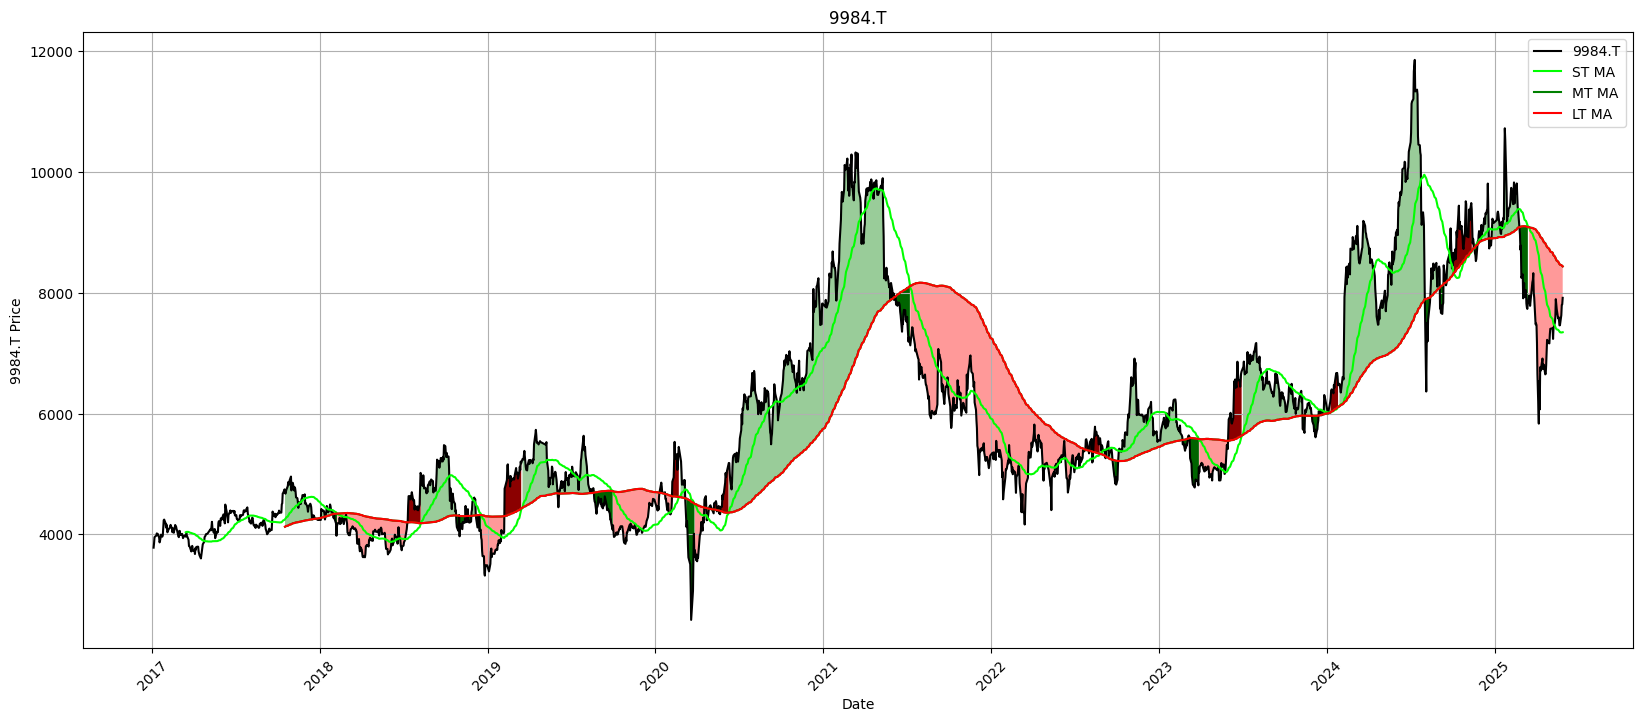

In [23]:
_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)

rg=lo=hi=slo=shi=clg=flr=rg_ch = None
lt_lo = lt_hi = st_lo = st_hi = 0

ma_st = df[_c].rolling(window=50).mean()
ma_mt = df[_c].rolling(window=200).mean()
ma_lt = df[_c].rolling(window=200).mean()

graph_regime_combo(ticker,df,_c,rg,lo,hi,slo,shi,clg,flr,rg_ch,ma_st,ma_mt,ma_lt,lt_lo,lt_hi,st_lo,st_hi)

This graph illustrates a multi-timeframe moving average crossover regime for Softbank (9984.T), with shaded regions that visually indicate trend alignment. The green shaded areas represent bullish conditions where the short-term, medium-term, and long-term moving averages are stacked upward, signaling a strong uptrend and potential long entry points. In contrast, red shaded regions indicate bearish regimes where the moving averages are stacked downward, suggesting a downtrend and potential exit or short opportunities. Unshaded zones reflect transitional or indecisive periods where the moving averages are not in clear alignment, often corresponding to sideways or choppy markets. This layered approach offers a more nuanced view of market trends, helping traders identify periods of strength or weakness with greater confidence.

This strategy has a rough time in sideways and volatile markets. Fast- and slow-moving averages converge to a flat line with low amplitude sinusoidal oscillations. Trading frequency and loss rate increase while win rate collapses.

A more succinct way to instantiate the three moving averages is via a list comprehension. First, we create a list of moving average variables. Second, we instantiate variables through a comprehension list.

<ipython-input-11-ea6d3e2aa7ea>:22: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax1.plot_date(df.index, close,'-', color='k',  label=ticker.upper())


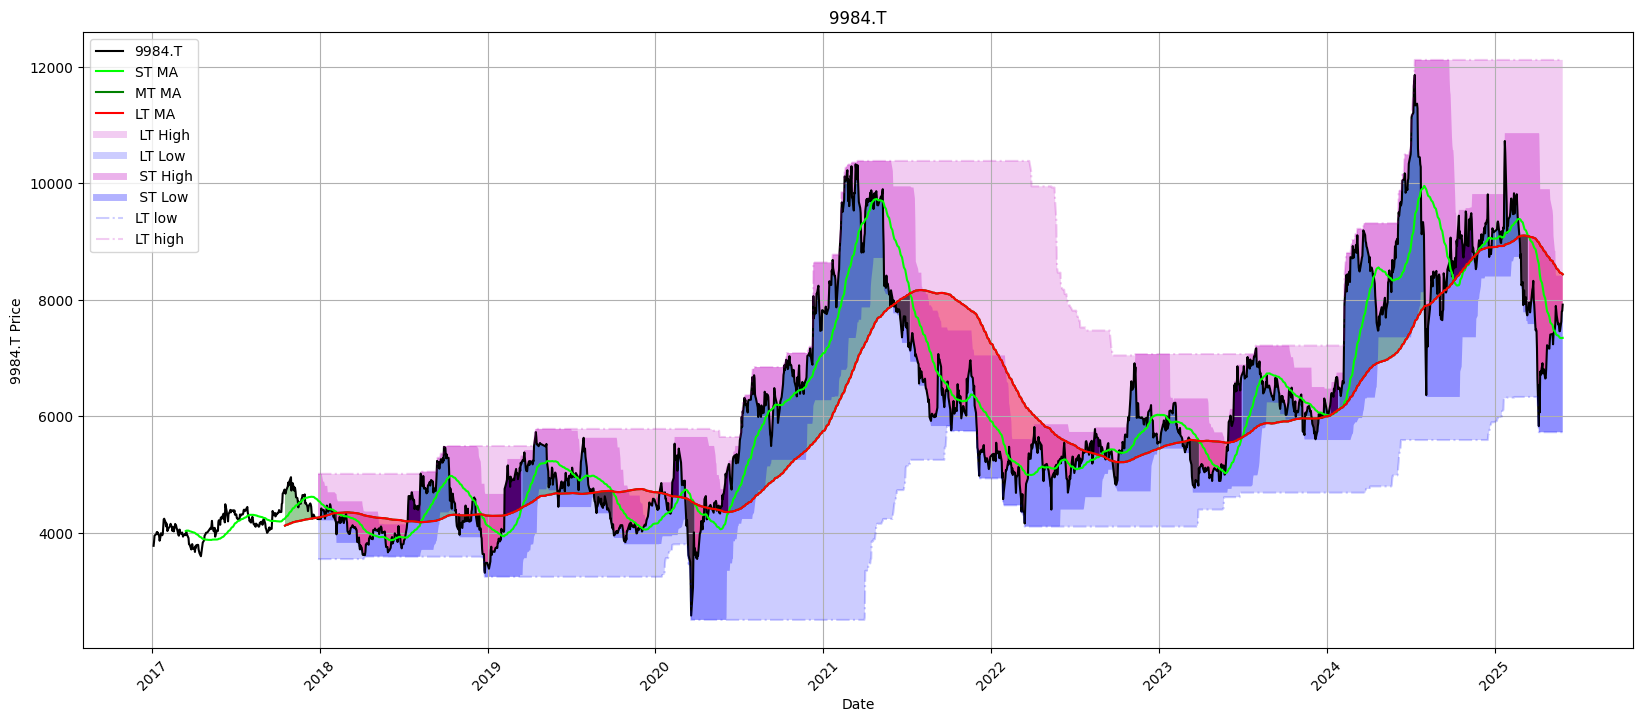

In [25]:
mav = [50, 200, 200]
ma_st,ma_mt,ma_lt = [df[_c].rolling(mav[t]).mean() for t in range(len(mav))]

bo = [50, 252]
st_lo,lt_lo = [df[_l].rolling(bo[t]).min() for t in range(len(bo))]
st_hi,lt_hi = [df[_h].rolling(bo[t]).max() for t in range(len(bo))]
ohlc = ['Open','High','Low','Close']
_o,_h,_l,_c = [ohlc[h] for h in range(len(ohlc))]

graph_regime_combo(ticker,df,_c,rg,lo,hi,slo,shi,clg,flr,rg_ch,ma_st,ma_mt,ma_lt,lt_lo,lt_hi,st_lo,st_hi)

Shaded regions represent range breakouts: the blue zone shows short-term breakout levels, while the purple zone shows longer-term breakouts. When the price is above both shaded areas and the short-term MA is rising above the long-term, it confirms strong bullish momentum—as seen in early 2021 and again in 2024. Conversely, when the price falls below these shaded zones and the short-term MA dips beneath the long-term, it signals bearish pressure, such as during mid-2021 and early 2025. Periods where the price moves sideways within the shaded regions, such as in 2019 or mid-2023, suggest consolidation and a lack of clear direction. Altogether, this chart effectively captures trend transitions, consolidations, and potential breakout opportunities.

The two-line crossover is the most popular version of the moving crossover method. The slower line defines the regime while the shorter duration line times entries and exits. The most popular duration is 50/200, known as golden/death cross. In theory, this combination makes sense. 200 days is a robust long-term measure, while 50 days is a good momentum indicator. In practice, this combination has an awful hit rate. It only works for big long-term trends. Unfortunately, they come few and far between, hence the win rate hovering around 20%. The rest of the time the faster moving-average flip-flops back and forth around the slower one.

These weaknesses lead moving-average aficionados to the next iteration of three moving averages. In the following example, we improve on the previous golden cross 50/200 moving average crossover by adding another shorter-duration moving average. For the sake of simplicity, we use 20, 50, and 200 days. The 200 days gives the regime, while the 20/50 permutation gives entries and exits.

<ipython-input-11-ea6d3e2aa7ea>:22: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax1.plot_date(df.index, close,'-', color='k',  label=ticker.upper())


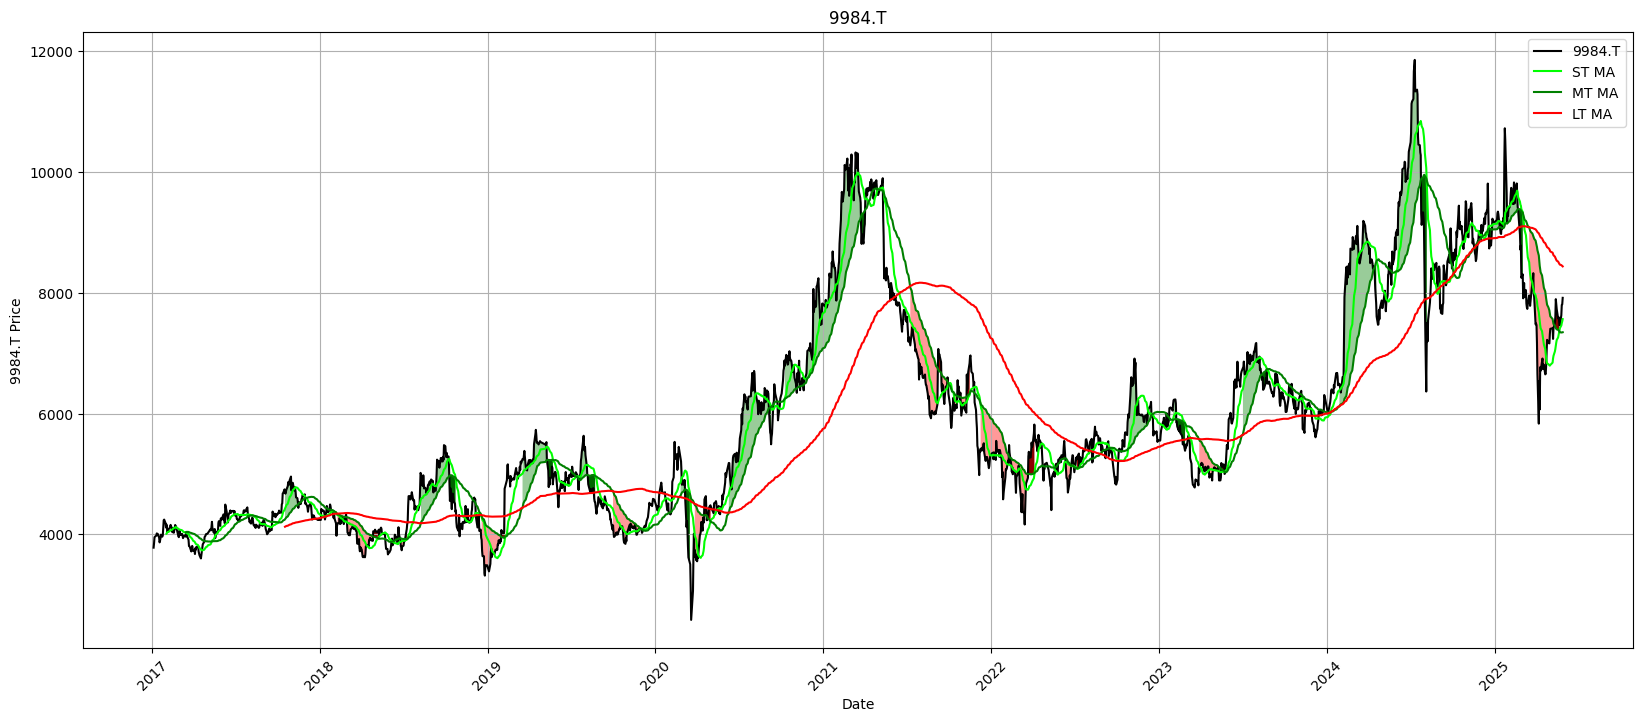

In [26]:
rg=lo=hi=slo=shi=clg=flr=rg_ch = None
lt_lo = lt_hi = st_lo = st_hi = 0

mav = [20, 50, 200]
ma_st,ma_mt,ma_lt = [df[_c].rolling(mav[t]).mean() for t in range(len(mav))]
ohlc = ['Open','High','Low','Close']
_o,_h,_l,_c = [ohlc[h] for h in range(len(ohlc))]

graph_regime_combo(ticker,df,_c,rg,lo,hi,slo,shi,clg,flr,rg_ch,ma_st,ma_mt,ma_lt,lt_lo,lt_hi,st_lo,st_hi)


The longest duration determines the regime. The two medium- and short-term durations time entries and exits respectively. Rather than a long paragraph, the logic can best be summarized as follows:

Long: Enter and stay long as the short-term moving average is the highest, followed by the mid- and long-term moving averages
Short: Enter and stay short as long as the short-term moving average is below the mid-term, which in turn needs to be below long-term moving average.
Else: Neutral, no position.
This method is probably the most practical compromise between following long-term established trends and maintaining decent risk management.

The graph shows price alongside a classic 2-line moving average crossover strategy using the 50-day (short-term, green) and 200-day (long-term, red) simple moving averages. The 200-day MA serves as the regime-defining line: when the 50-day crosses above it, it triggers a bullish regime (a "golden cross"); when it crosses below, it triggers a bearish regime (a "death cross"). These crossovers are visually clear in the graph, especially around early 2021 (bullish) and late 2021/early 2022 (bearish). However, as highlighted in your explanation, the effectiveness of this strategy is diminished during choppy or sideways markets such as in 2018 and 2019 where the 50-day line oscillates around the 200-day line, leading to frequent, false signals. This noise is evident in the tangled overlap of the two lines without sustained separation. Overall, the chart validates the theoretical foundation of the strategy, demonstrating strong performance in long trends and weakness in range-bound conditions